In [1]:
from to_merge import CustomAreaMap
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [2]:
nside = 64
sky = CustomAreaMap(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps()

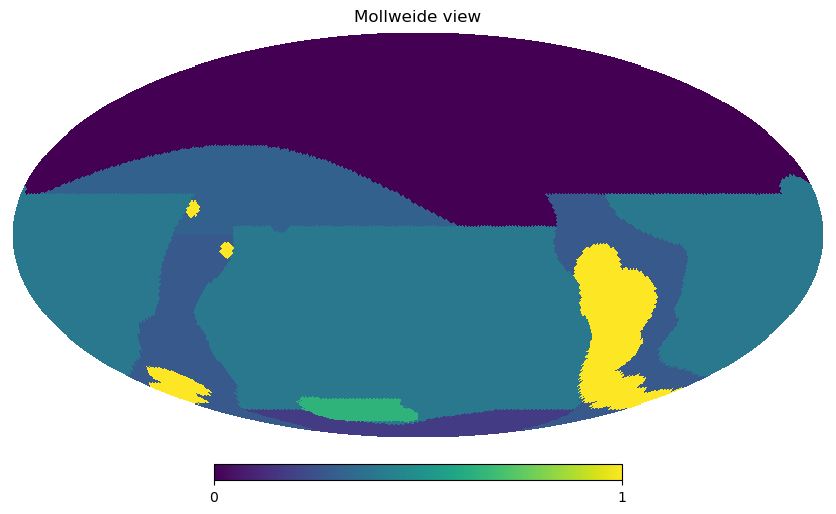

In [3]:
hp.mollview(footprints_hp_array['g'])

0 
1 LMC_SMC
2 bulgy
3 dusty_plane
4 euclid_overlap
5 lowdust
6 nes
7 scp
8 virgo


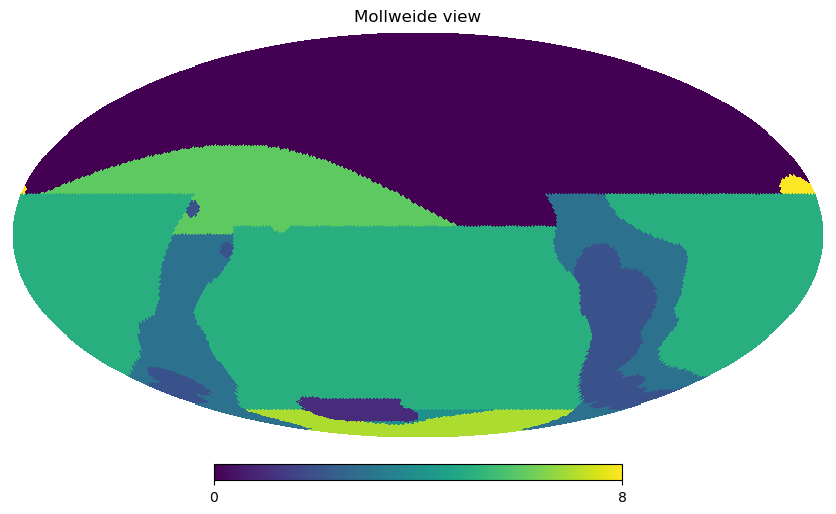

In [4]:
# Look at the labels
label_int = np.zeros(hp.nside2npix(nside))
for i,label in enumerate(np.unique(labels)):
    indx = np.where(labels == label)[0]
    label_int[indx] = i
    print(i, label)
hp.mollview(label_int)

In [14]:
ack, sm, lables = sky.estimate_visits(2.1e6)

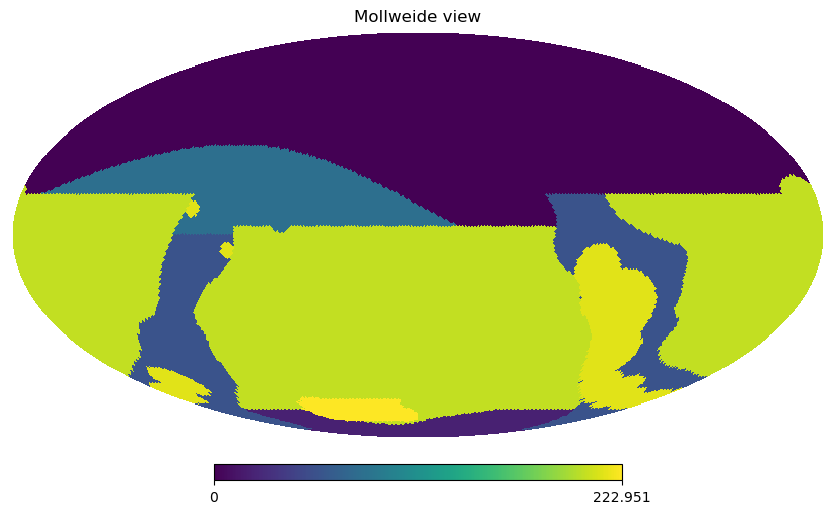

In [15]:


hp.mollview(ack['r'])

[  0.          27.36221827  56.75126752  81.07323931 202.68309828
 212.8172532  222.95140811]


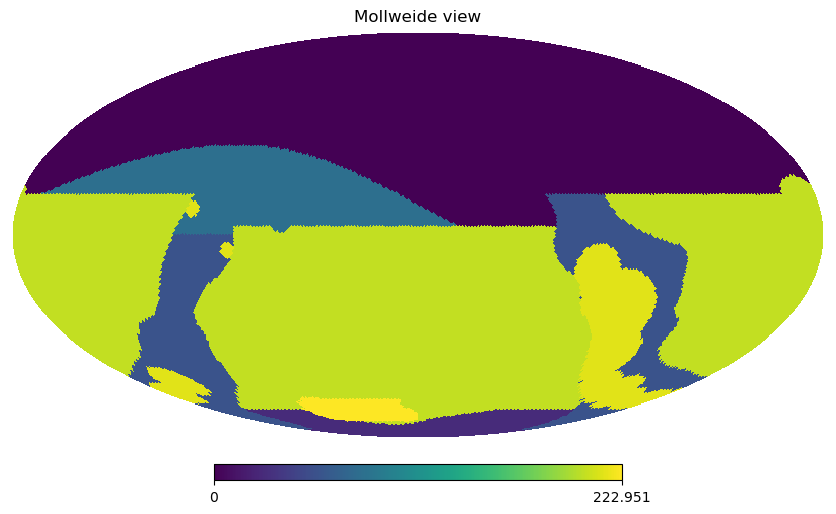

In [16]:
hp.mollview(ack['i'])
print(np.unique(ack['i']))

In [18]:
ack

array([( 0.        ,  0.       ,  0.        ,  0.        , 0.        , 0.        ),
       ( 0.        ,  0.       ,  0.        ,  0.        , 0.        , 0.        ),
       ( 0.        ,  0.       ,  0.        ,  0.        , 0.        , 0.        ),
       ...,
       (20.26830983, 35.4695422, 20.26830983, 27.36221827, 9.32342252, 9.52610562),
       (20.26830983, 35.4695422, 20.26830983, 27.36221827, 9.32342252, 9.52610562),
       (20.26830983, 35.4695422, 20.26830983, 27.36221827, 9.32342252, 9.52610562)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('y', '<f8')])

 0.0
LMC_SMC 849.2421818035024
bulgy 914.100773253889
dusty_plane 267.5416897328456
euclid_overlap 922.2080971851874
lowdust 922.2080971851874
nes 281.7295066126177
scp 122.21790826432263
virgo 922.2080971851874
24020198.55032708


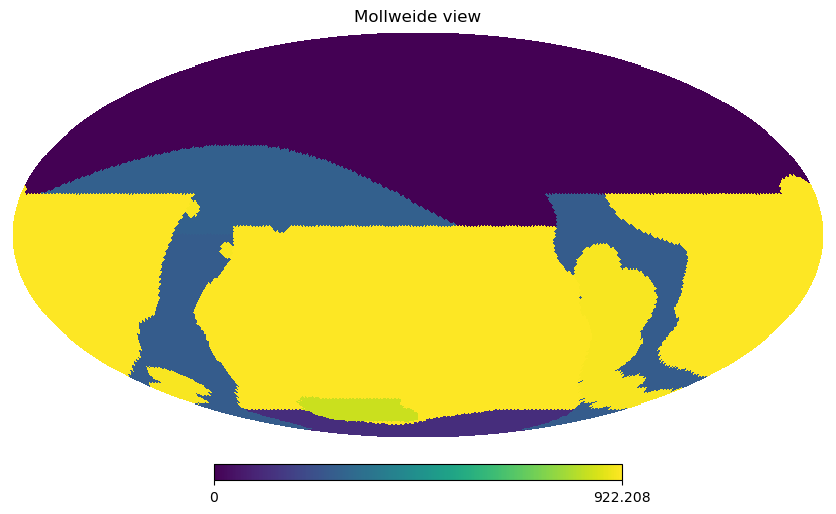

In [30]:
all_bands = 0
for key in ack.dtype.names:
    all_bands += ack[key]
hp.mollview(all_bands)

for lab in np.unique(labels):
    good = np.where(labels == lab)[0][0]
    print(lab, all_bands[good])

print(all_bands.sum())

In [25]:
print(lab, all_bands[good].max())

scp 122.21790826432263


In [8]:
indx = np.where(labels == 'LMC_SMC')[0]
tots = 0
for filtername in 'ugrizy':
    print(filtername, np.unique(ack[filtername][indx]))
    tots += ack[filtername][indx][0]
tots

u [131.74401388]
g [131.74401388]
r [222.95140811]
i [222.95140811]
z [68.91225342]
y [70.9390844]


849.2421818035024

In [9]:
indx = np.where(labels == 'lowdust')[0]
tots = 0
for filtername in 'ugrizy':
    print(filtername, np.unique(ack[filtername][indx]))
    tots += ack[filtername][indx][0]
tots

u [70.9390844]
g [81.07323931]
r [202.68309828]
i [202.68309828]
z [182.41478845]
y [182.41478845]


922.2080971851874

In [10]:
928-854

74